In [1]:
# Modules

# Load module to create Panda DataFrames in Jupyter Notebooks
import pandas as pd
# Load module to create and format various plots
import matplotlib.pyplot as plt
# Load module to handle high-level math functions and basic algebraz
import numpy as np
# Load module to allow communication with HTTPS for API requests
import requests
# Load module that deserializes java script open notation into Jupyter Notebooks
import json
# Load module that returns the number of seconds passed since epoch 
import time
# Load module that contains probability distributions and statistical functions
from scipy.stats import linregress
# Load module for plot aesthetics
import seaborn as sns

In [2]:
# Fertility CSV:

# Define variable name that holds csv file location of the fertility rates
fertility_csv = "csv_files/Age-specific fertility rates, Total fertility and .csv"
# Define variable name the holds the read information from the csv file
fertility_csv_dataframe = pd.read_csv(fertility_csv)
# Print to screen in Pandas DataFrame the read csv information
fertility_csv_dataframe.head()

,"United Nations, Department of Economic and Social Affairs",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,"Population Division, Fertility and Family Plan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World Fertility Data 2012\nAGE-SPECIFIC FERTIL...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country,ISO code,Period,Reference,NaN,Total fertility,Age-specific fertility rates,NaN,NaN,NaN,...,NaN,NaN,Mean age at childbearing,Source type,Source,Survey name,Note on country or population,Note on age,Note on methods,Note on population data used in denominator
3,NaN,NaN,NaN,Year,Period,NaN,15-19,20-24,25-29,30-34,...,40-44,45-49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,4,Around 1970,1973,1972-1973,8.21,168,359,355,307,...,137,81,30,Survey,National statistics,Afghanistan 1972-1974 National Demographic and...,NaN,NaN,NaN,NaN


In [3]:
# Clean:

# Define variable name that holds drop column information
fertility_clean = fertility_csv_dataframe.drop([0, 1])
# Use pandas column rename function (.columns) to rename the columns in the dataframe
fertility_clean.columns= ['Country', 'ISO Code', 'Period', 'Reference Year', 'Period', 'Total Fertility',
                          'Age-specific fertility rates: 15-19','Age-specific fertility rates: 20-24',
                          'Age-specific fertility rates: 25-29', 'Age-specific fertility rates: 30-34',
                         'Age-specific fertility rates: 35-39','Age-specific fertility rates: 40-44',
                          'Age-specific fertility rates: 45-49', 'Mean Age at Childbearing', 'D1', 'D2', 'D3','D4','D5','D6','D7']
# Drop additional columns from the already cleaned variable
fertility_clean = fertility_clean.drop(columns=['Period','D1','D2','D3','D4','D5','D6','D7'])
fertility_clean = fertility_clean.drop([2, 3])

#reference_years =sorted(fertility_clean['Reference Year'].unique())
#reference_years=fertility_clean["Reference Year"].unique()
#reference_years

# Print to screen the cleaned data variable 'fertility_clean'
fertility_clean

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
4,Afghanistan,4,1973,8.21,168,359,355,307,235,137,81,30
5,Afghanistan,4,1979,7.11,105,260,309,301,262,185,..,30.7
6,Afghanistan,4,2003,7.52,146,333,350,289,217,143,..,30.1
7,Afghanistan,4,2009,5.11,80,257,262,209,128,60,26,29.1
8,Albania,8,1970,5.16,39,275,266,214,146,69,22,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...
1072,Zimbabwe,716,1969,6.74,79,272,304,257,218,145,73,31.2
1073,Zimbabwe,716,1987,5.42,102,251,250,212,158,80,32,29.5
1074,Zimbabwe,716,1998,3.98,112,199,180,135,108,46,15,28.3
1075,Zimbabwe,716,2004,3.8,99,205,172,144,86,42,13,28.1


In [4]:
# Sort:

# Define variable the holds the sort function of 'Reference Year' from most rescent
last_year=fertility_clean.sort_values('Reference Year', ascending=False).drop_duplicates(['ISO Code'])

reference_years =last_year['Reference Year'].unique()
fertility_clean = fertility_clean.loc[fertility_clean['Total Fertility'] != '..']
fertility_clean = fertility_clean.loc[fertility_clean['Mean Age at Childbearing'] != '..']
fertility_clean['Total Fertility']=fertility_clean['Total Fertility'].astype(float)
fertility_clean['Mean Age at Childbearing']=fertility_clean['Mean Age at Childbearing'].astype(float)
#reference_years=fertility_clean["Reference Year"].unique()
fertility_clean
fertility_clean.to_csv ("clean_data/fertility_clean.csv", index = False, header=True)

In [5]:
# Literacy CSV:

# Define variable name that holds the csv file location of the literacy rates
file_literacy = "csv_files/literacy-rate-adults.csv"
# Define variable name that holds the read information from the csv
literacy_df = pd.read_csv(file_literacy)
# Print to screen, in Pandas DataFrame, the read csv information
literacy_df.head(10)

,Entity,Code,Year,"Literacy rate, adult total (% of people ages 15 and above)"
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Albania,ALB,2001,98.712982
3,Albania,ALB,2008,95.938637
4,Albania,ALB,2011,96.845299
5,Albania,ALB,2012,97.246971
6,Algeria,DZA,1987,49.630878
7,Algeria,DZA,2002,69.873497
8,Algeria,DZA,2006,72.648682
9,Algeria,DZA,2008,75.136047


In [6]:
# Change Name:

# change field name in literacy rate to literacy_rate
literacy_df.columns = ["Country", "Code", "Reference Year", "Literacy Rate"]
literacy_df['Reference Year']=literacy_df['Reference Year'].astype(str)
literacy_df

,Country,Code,Reference Year,Literacy Rate
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.741119
2,Albania,ALB,2001,98.712982
3,Albania,ALB,2008,95.938637
4,Albania,ALB,2011,96.845299
...,...,...,...,...
2221,Zambia,ZMB,2010,83.007668
2222,Zimbabwe,ZWE,1982,77.794167
2223,Zimbabwe,ZWE,1992,83.512581
2224,Zimbabwe,ZWE,2011,83.582710


## Do Literacy rates effect fertility rates by age?

In [7]:
# Merge:

# merge on Country and Entity
# create df that has Country, Total Fertility, literacy_rate
correlation_df = fertility_clean.merge(literacy_df, on=['Country','Reference Year'], how='inner')
correlation_df['Total Fertility']=correlation_df['Total Fertility'].astype(float)
correlation_df['ISO Code']=correlation_df['ISO Code'].astype(float)
correlation_df
fertility_clean.to_csv ("clean_data/fertility_clean.csv", index = False, header=True)

<Figure size 720x720 with 0 Axes>

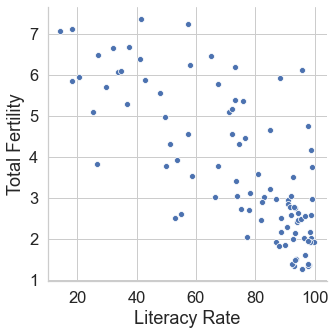

In [73]:
sns.set_context(font_scale=1.25)
sns.relplot(data=correlation_df, x="Literacy Rate", y="Total Fertility")
sns.set_style("whitegrid")


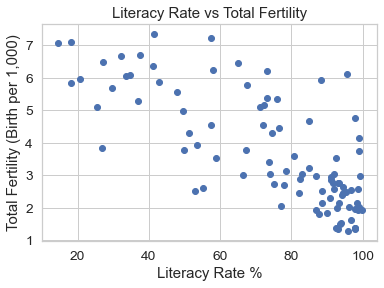

In [34]:
# Scatter Plot:

# Use Matplotlib to create scatter plot and format
plt.scatter(correlation_df["Literacy Rate"],
           correlation_df["Total Fertility"], marker="o")
# Create a unique plot title
plt.title('Literacy Rate vs Total Fertility')
# Create a lable for the y axis
plt.ylabel("Total Fertility (Birth per 1,000)")
# Create a lable for the x axis
plt.xlabel("Literacy Rate %")
# Save a png image of the scatter plot to local folder
plt.savefig('literacy_rates_vs_total_fertility')
# Print scatter plot to screen

plt.show()

#### Scatter Plot Observation:
This is a scatter plot that shows the correlation between the total fertility of births per thousand and the overall literacy rate.  It looks like there is some correlation between the two as the fertility datapoints decrease as the literacty rate increases.  We might be able to get more data points to confirm this.

In [20]:
# Linear Regression Passthrough:

# Use Python define function (def) to start a linear regression function 
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue}")
    print(f"Intercept: {intercept}")
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=20,color="black")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)


The r-squared is: 0.2793778965263324
Intercept: 28.188115239689832


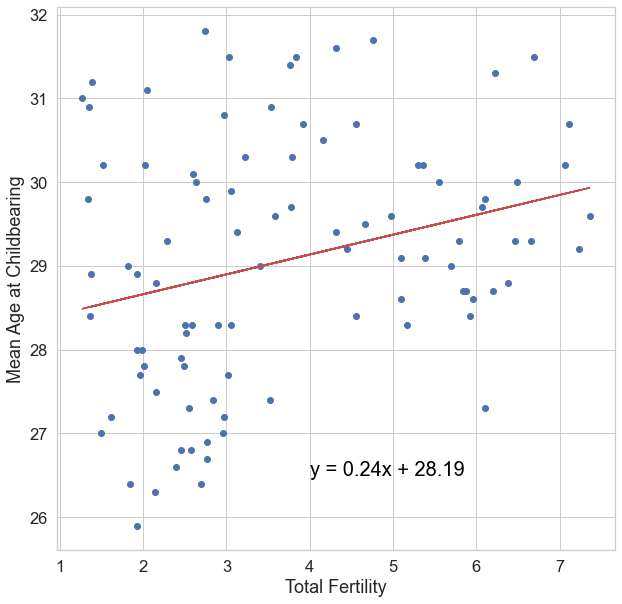

In [78]:
ylbl = "Mean Age at Childbearing"
xlbl = "Total Fertility"
lblpos = (4,26.5)
plt.figure(figsize=(10,10))
plotLinearRegression(correlation_df[xlbl],correlation_df[ylbl],xlbl,ylbl,lblpos)
plt.savefig('./Charts/LinearReg_AgeVFert')

The r-squared is: -0.7489005930271825
Intercept: 7.657954805495637


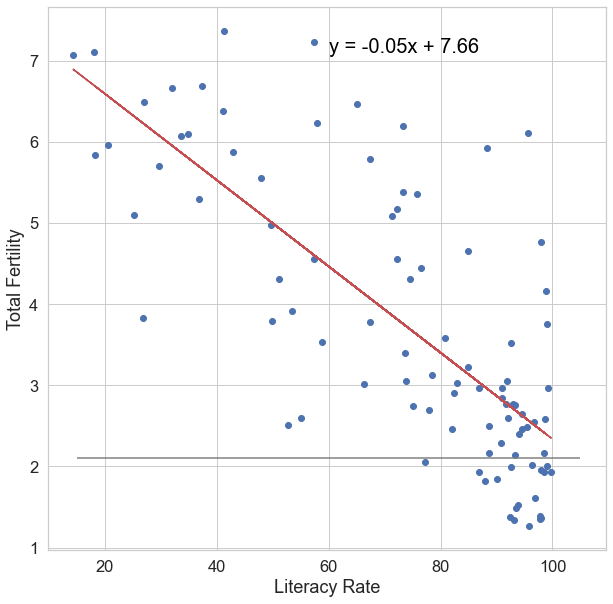

In [71]:
xlbl = "Literacy Rate"
ylbl = "Total Fertility"
lblpos = (60,7.1)
plt.figure(figsize=(10,10))
plt.hlines(y=2.1,color="gray",xmin=15, xmax=105)
plotLinearRegression(correlation_df[xlbl],correlation_df[ylbl],xlbl,ylbl,lblpos)
plt.savefig('./Charts/LinearReg_FertVLit')

#### Linear Regression Observation:
This linear regression line shows that there is a strong correlation between the fertility rate and literacy rates.  It might be helpful to compare other factors to the fertility rate such as age, country and income to see how they compare.

### What are the countries with high literacy and high fertility

In [37]:
outliers_df=correlation_df.loc[correlation_df["Literacy Rate"]>80]
outliers_df=outliers_df.loc[outliers_df["Total Fertility"]>4]


below_replacement=fertility_clean.loc[fertility_clean["Total Fertility"]<2.1]
above_replacement=fertility_clean.loc[fertility_clean["Total Fertility"]>2.1]
above_replacement
last_below_rep=below_replacement.sort_values('Reference Year', ascending=False).drop_duplicates(['Country'])
last_ab_rep=above_replacement.sort_values('Reference Year', ascending=False).drop_duplicates(['Country'])
last_ab_rep

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing
859,Seychelles,690,2011,2.54,78,124,123,110,55,19,..,27.5
321,Ethiopia,231,2010,4.80,79,207,237,192,150,68,28,29.8
516,Kyrgyzstan,417,2010,3.13,34,176,183,136,71,22,3,28.4
84,Bangladesh,50,2010,2.32,118,153,107,56,21,6,3,24.7
739,Panama,591,2010,2.40,86,133,117,85,45,12,1,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Belgium,56,1970,2.24,31,149,143,78,36,10,1,27.2
865,Singapore,702,1970,3.10,26,139,210,138,75,27,5,29.1
123,Bosnia and Herzegovina,70,1970,2.65,44,174,142,93,54,21,2,27.6
820,Saint Pierre and Miquelon,666,1969,3.79,95,200,172,127,98,67,0,28.4


The r-squared is: -0.10768225593081858
Intercept: 29.82874060554283


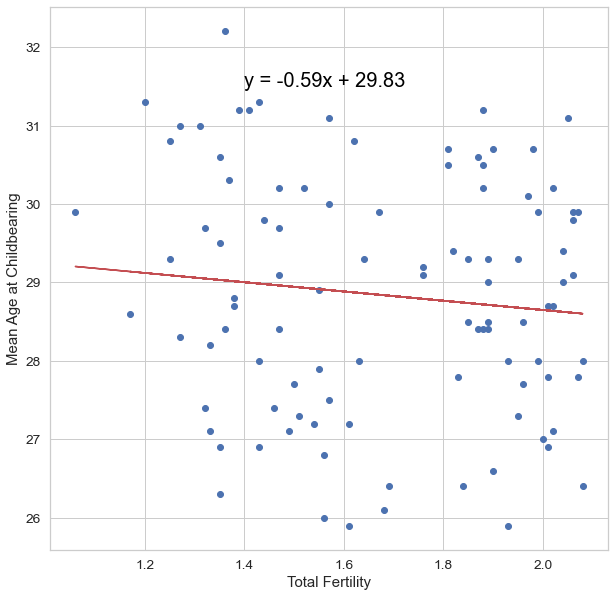

In [42]:
xlbl = "Total Fertility"
ylbl = "Mean Age at Childbearing"
lblpos = (1.4,31.5)
plotLinearRegression(last_below_rep[xlbl],last_below_rep[ylbl],xlbl,ylbl,lblpos)
plt.rcParams["figure.figsize"] = 10,10
plt.savefig('./Charts/LinearReg_AgeVFert_Below_Rep.png')

The r-squared is: 0.450553948294075
Intercept: 26.508300932200964


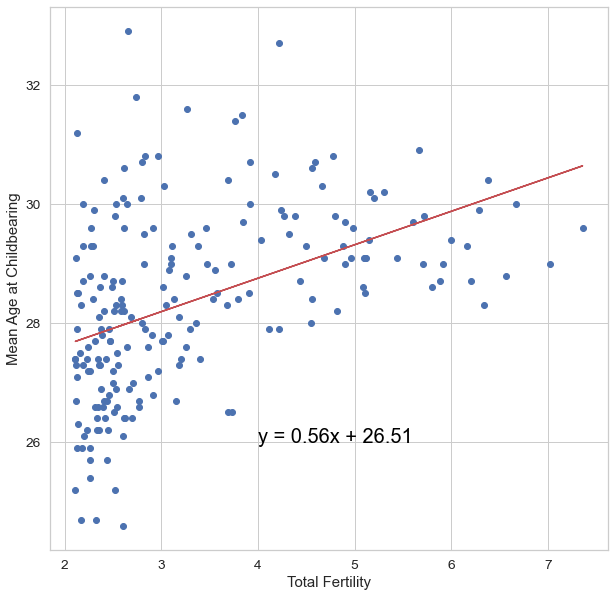

In [41]:
xlbl = "Total Fertility"
ylbl = "Mean Age at Childbearing"
lblpos = (4,26)
plotLinearRegression(last_ab_rep[xlbl],last_ab_rep[ylbl],xlbl,ylbl,lblpos)
plt.rcParams["figure.figsize"] = 10,10
plt.savefig('./Charts/LinearReg_AgeVFert_Above_Rep.png')

{'whiskers': [<matplotlib.lines.Line2D at 0x17dc46cdd30>,
 'caps': [<matplotlib.lines.Line2D at 0x17dc46db430>,
 'boxes': [<matplotlib.lines.Line2D at 0x17dc46cd9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x17dc46dbaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17dc46dbdf0>],
 'means': []}

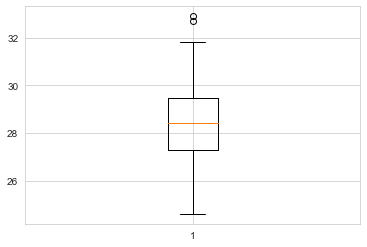

In [17]:
plt.boxplot(last_ab_rep['Mean Age at Childbearing'])

{'whiskers': [<matplotlib.lines.Line2D at 0x17dc472c4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x17dc472cbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17dc472c190>],
 'medians': [<matplotlib.lines.Line2D at 0x17dc47362e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17dc47365e0>],
 'means': []}

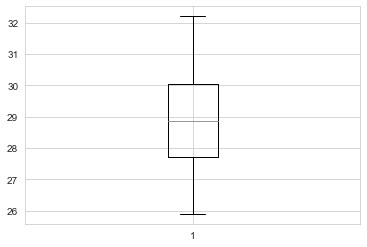

In [18]:
plt.boxplot(last_below_rep['Mean Age at Childbearing'])

## What is the ranking of factors that affect fertility

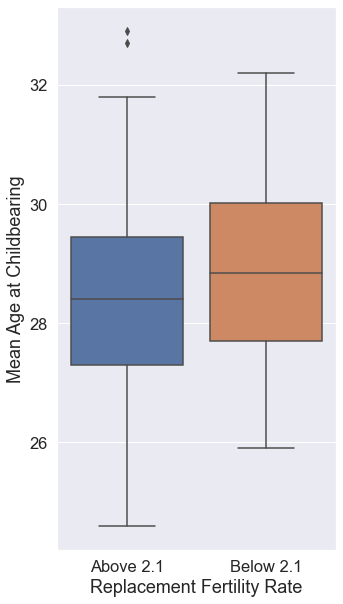

In [59]:
# create df that are greater than 2.1 fertilty rates in one group and less than or equal to 2.1 fertality rates
last_below_rep["Replacement Fertility Rate"]='Below 2.1'
last_ab_rep["Replacement Fertility Rate"]='Above 2.1'
replacement_df = pd.concat([last_ab_rep, last_below_rep])
plt.figure(figsize=(5,10))
sns.set(font_scale=1.5)
sns.boxplot(x="Replacement Fertility Rate", y="Mean Age at Childbearing", data=replacement_df)
plt.savefig('./Charts/Mean_Age_VS_Replacement.png')

{'whiskers': [<matplotlib.lines.Line2D at 0x17dc57d77f0>,
 'caps': [<matplotlib.lines.Line2D at 0x17dc57d7eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17dc57d7490>],
 'medians': [<matplotlib.lines.Line2D at 0x17dc57e35b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17dc57e38b0>],
 'means': []}

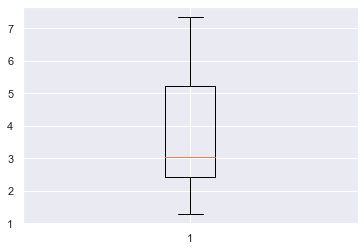

In [27]:
plt.boxplot(correlation_df['Total Fertility'])

## Where are fertility rates increasing and decreasing in comparison to literacy rates? 

## How has the age of childbearing changed over time?

In [28]:
outliers_df

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Literacy Rate
25,Equatorial Guinea,226.0,2000,5.92,196,256,252,208,187,54,31,28.4,GNQ,88.308296
65,Saint Vincent and the Grenadines,670.0,1970,6.11,181,345,286,217,136,52,6,27.3,VCT,95.632156
66,Samoa,882.0,1991,4.76,25,159,241,216,175,98,38,31.7,WSM,97.944328
69,Sao Tome and Principe,678.0,2001,4.66,91,216,202,185,154,64,20,29.5,STP,84.908508
84,Tonga,776.0,1996,4.16,17,160,239,209,139,59,8,30.5,TON,98.905373


In [46]:
cont= "csv_files/country-and-continent-codes-list-csv.csv"
continents_df = pd.read_csv(cont)
continents_df = continents_df.drop(columns=['Continent_Code','Two_Letter_Country_Code','Three_Letter_Country_Code','Country_Name'])
continents_df.columns = ['Continent', 'ISO Code']
continents_df

,Continent,ISO Code
0,Asia,4.0
1,Europe,8.0
2,Antarctica,10.0
3,Africa,12.0
4,Oceania,16.0
...,...,...
257,Africa,894.0
258,Oceania,NaN
259,Asia,NaN
260,Asia,NaN


In [47]:
correlation_df = correlation_df.drop_duplicates()
correlation_df

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Literacy Rate
0,Afghanistan,4.0,1979,7.11,105,260,309,301,262,185,..,30.7,AFG,18.157681
1,Algeria,12.0,2008,2.74,9,75,139,149,118,51,8,31.8,DZA,75.136047
2,Angola,24.0,2001,5.79,122,270,262,217,190,62,35,29.3,AGO,67.405418
3,Antigua and Barbuda,28.0,2001,2.01,67,94,88,79,56,19,1,27.8,ATG,98.949997
4,Aruba,533.0,2010,1.61,40,92,86,68,29,8,0,27.2,ABW,96.822639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Uruguay,858.0,1985,2.49,56,130,137,100,56,18,2,27.8,URY,95.379982
91,Uruguay,858.0,1996,2.55,76,128,134,100,55,16,1,27.3,URY,96.781807
92,Uruguay,858.0,2007,1.96,59,92,92,86,48,12,1,27.7,URY,97.863892
93,Uzbekistan,860.0,2000,2.58,21,205,161,90,31,7,1,26.8,UZB,98.642578


In [48]:
corrWcon_df = correlation_df.merge(continents_df, on=['ISO Code'], copy= False)
corrWcon_df = corrWcon_df.drop_duplicates(subset=['Country', 'Reference Year'])
corrWcon_df

,Country,ISO Code,Reference Year,Total Fertility,Age-specific fertility rates: 15-19,Age-specific fertility rates: 20-24,Age-specific fertility rates: 25-29,Age-specific fertility rates: 30-34,Age-specific fertility rates: 35-39,Age-specific fertility rates: 40-44,Age-specific fertility rates: 45-49,Mean Age at Childbearing,Code,Literacy Rate,Continent
0,Afghanistan,4.0,1979,7.11,105,260,309,301,262,185,..,30.7,AFG,18.157681,Asia
1,Algeria,12.0,2008,2.74,9,75,139,149,118,51,8,31.8,DZA,75.136047,Africa
2,Angola,24.0,2001,5.79,122,270,262,217,190,62,35,29.3,AGO,67.405418,Africa
3,Antigua and Barbuda,28.0,2001,2.01,67,94,88,79,56,19,1,27.8,ATG,98.949997,North America
4,Aruba,533.0,2010,1.61,40,92,86,68,29,8,0,27.2,ABW,96.822639,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Uruguay,858.0,1985,2.49,56,130,137,100,56,18,2,27.8,URY,95.379982,South America
93,Uruguay,858.0,1996,2.55,76,128,134,100,55,16,1,27.3,URY,96.781807,South America
94,Uruguay,858.0,2007,1.96,59,92,92,86,48,12,1,27.7,URY,97.863892,South America
95,Uzbekistan,860.0,2000,2.58,21,205,161,90,31,7,1,26.8,UZB,98.642578,Asia


In [50]:
outliers_df=corrWcon_df.loc[corrWcon_df["Literacy Rate"]>80]
outliers_df=outliers_df.loc[outliers_df["Total Fertility"]>4]
outliers_df=outliers_df.set_index('Country')
outliers_t=outliers_df.T
outliers_t

Country,Equatorial Guinea,Saint Vincent and the Grenadines,Samoa,Sao Tome and Principe,Tonga
ISO Code,226,670,882,678,776
Reference Year,2000,1970,1991,2001,1996
Total Fertility,5.92,6.11,4.76,4.66,4.16
Age-specific fertility rates: 15-19,196,181,25,91,17
Age-specific fertility rates: 20-24,256,345,159,216,160
Age-specific fertility rates: 25-29,252,286,241,202,239
Age-specific fertility rates: 30-34,208,217,216,185,209
Age-specific fertility rates: 35-39,187,136,175,154,139
Age-specific fertility rates: 40-44,54,52,98,64,59
Age-specific fertility rates: 45-49,31,6,38,20,8


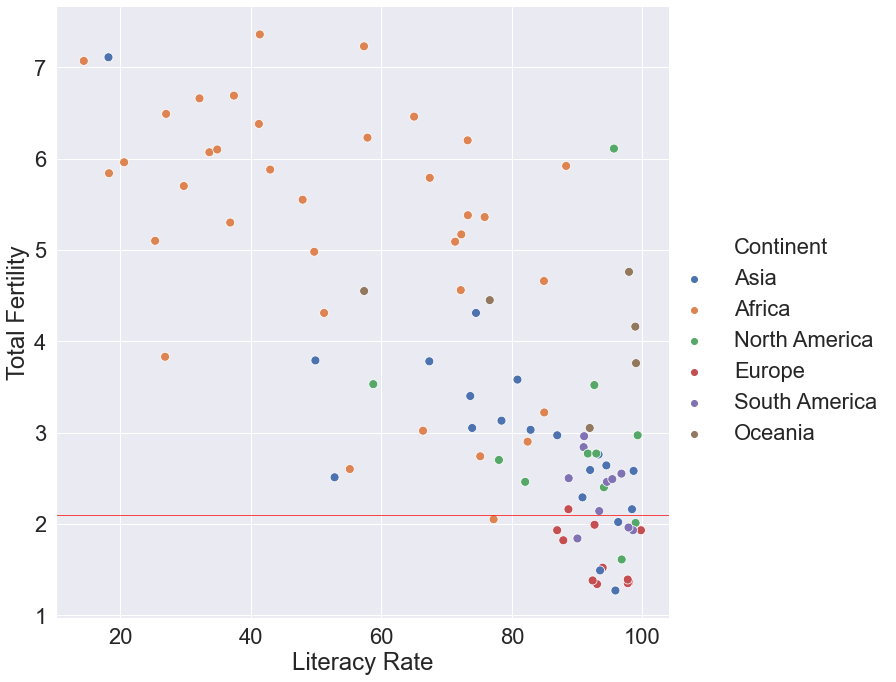

In [52]:
sns.set_style("darkgrid")
sns.set(font_scale=2)
chart = sns.relplot(data=corrWcon_df, s=80, x="Literacy Rate", y="Total Fertility",
                    hue="Continent",height=10, aspect=10/10)
chart.axes[0][0].axhline(y = 2.1, color='red', linewidth=1, alpha=.7)
plt.savefig('./Charts/Tot_Fert_VS_Literacy_Colors.png')


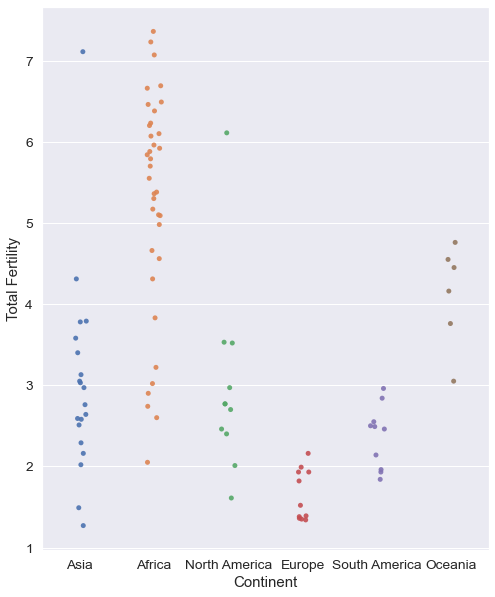

In [58]:
plt.figure(figsize=(8,10))
sns.set(font_scale=1.25)
bplot=sns.stripplot(y='Total Fertility', x='Continent', 
                   data=corrWcon_df, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.9)
plt.savefig('./Charts/Total_Fertility_By_Continent.png')

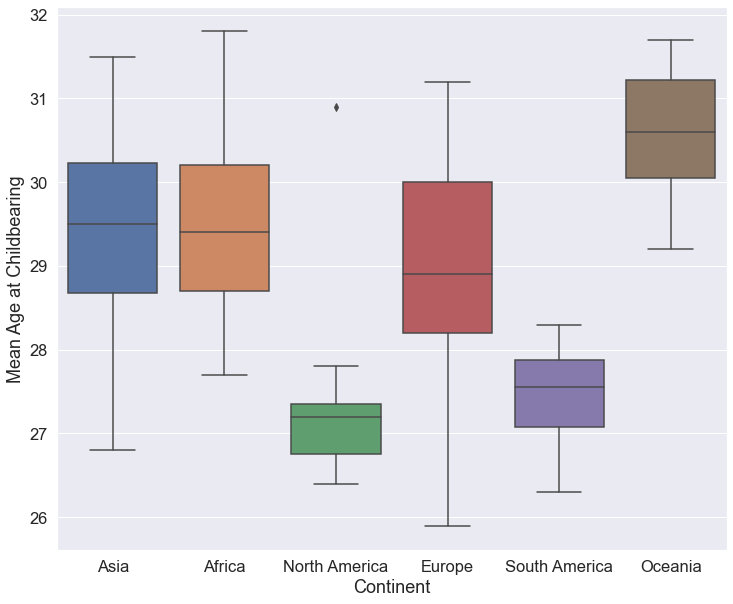

In [60]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.5)
sns.boxplot(x="Continent", y="Mean Age at Childbearing", data=corrWcon_df)
plt.savefig('./Charts/Mean_Age_By_Continent_Box.png')